# Spatial-Temporal Exploratory Data Analysis: Food Crises

**Tasks**
* Conduct non-spatial temporal analysis
* Conduct spatial analysis
* Conduct temporal analysis
* Pre-process data according to analysis
* Run time: < 10 minutes

env packages: standard env, +pysal, + jupyter, + matplotlib

Sources
- Autocorrelations: https://geographicdata.science/book/notebooks/06_spatial_autocorrelation.html#spatial-autocorrelation


In [291]:
import os
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
from statistics import mean
import timeit
import statsmodels.api as sm

#Visuals
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

os.getcwd()
start = timeit.default_timer()

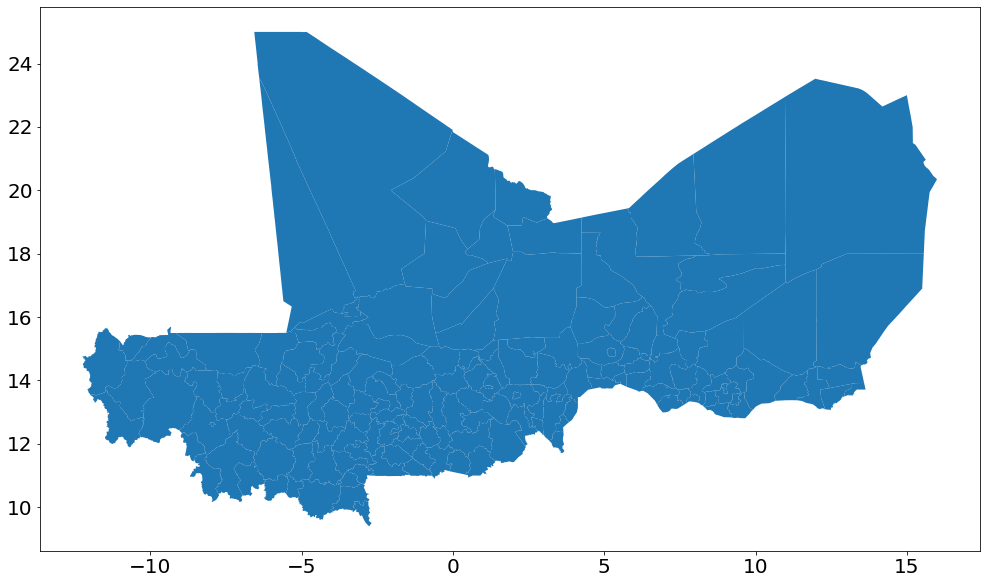

Names in FS df but not in shape gdf set()
Names in shape gdf but not in FS df set()


In [274]:
# Get data from pre-processing file
%run EDA_preprocessing.ipynb

## 3. Exploratory Analysis

**Non spatial-temporal analysis**
* Check predictive feature
* Examine covariate correlations

In [275]:
#### NON SPATIAL-TEMPORAL ANALYSIS ####

# Look at data
df.describe()

,admin_code,centx,centy,year,month,fews_ipc,ndvi_mean,rain_mean,et_mean,acled_count,acled_fatalities,p_staple_food,area,cropland_pct,pop,ruggedness_mean,pasture_pct
count,19440.000000,19440.000000,19440.000000,19440.000000,19440.000000,19440.000000,19440.000000,1.944000e+04,19440.000000,19440.000000,19440.000000,19440.000000,19440.000000,19440.000000,1.944000e+04,19440.000000,19440.000000
mean,258.154321,0.515578,13.883174,2014.500000,6.500000,1.171656,0.265417,8.004512e+00,3.158227,0.312963,0.670936,1.089125,16773.942587,39.410552,3.395808e+05,23692.549148,55.053589
std,62.936876,5.890012,2.053638,2.872355,3.452141,0.435227,0.140629,1.225984e+01,5.721573,1.258173,6.300229,0.135180,38232.657773,29.780634,3.356113e+05,18551.858893,32.376967
min,152.000000,-11.472250,9.872688,2010.000000,1.000000,1.000000,0.085273,8.090000e-11,0.000000,0.000000,0.000000,0.644939,74.249330,0.000328,8.948000e+03,1474.106000,0.000000
25%,192.000000,-3.884152,12.625900,2012.000000,3.750000,1.000000,0.160832,6.889912e-02,0.187838,0.000000,0.000000,0.995922,3878.901000,13.292780,1.595125e+05,9551.282000,29.457350
50%,266.500000,-0.006952,13.671125,2014.500000,6.500000,1.000000,0.224242,9.838230e-01,0.598428,0.000000,0.000000,1.076944,6656.694500,32.886345,2.675810e+05,20458.150000,64.465160
75%,307.000000,4.949287,14.765230,2017.000000,9.250000,1.000000,0.331174,1.243592e+01,2.798015,0.000000,0.000000,1.172972,12438.090000,62.965900,4.076815e+05,32786.820000,80.839290
max,359.000000,13.499180,21.184900,2019.000000,12.000000,3.000000,0.767556,9.758721e+01,40.150040,26.000000,294.000000,1.822950,331292.000000,99.240250,3.659406e+06,103612.200000,97.625000


In [299]:
# Examine predictive feature (few_ipc & flooding) - barplots
fig = go.Figure()
fig.add_trace(go.Bar(x= [1, 2, 3], y= df['fews_ipc'].value_counts(),
                     text = df['fews_ipc'].value_counts(), textposition='outside',
                     marker_color = '#08306B'))
fig.update_xaxes(title= 'FEWS IPC Score', tickvals = [1, 2, 3], showticklabels=True, visible=True, showgrid=False)
fig.update_yaxes(title= 'Number of instances', range = [0,20000], showticklabels=True, visible=True, showgrid=True)
fig.update_layout(title =
                  {'text': '<b>Barplot of FEWS IPC Score Distribution</b>',
                   'font': {'size':20, 'family':'Arial', 'color': 'black'},
                   'xanchor':'center',
                   'x': 0.5,
                   'y': 0.95 },
                  font_family= 'Arial',
                  font_color='black',
                  width = 700, height = 700,
                  margin = dict(t=70,r=70,b=70,l=70))
fig.show()
fig.write_image('Images/barplot.png')


In [277]:
# Examine correlation between features and target variable - corplots
corrmat = df.corr()
fig = px.imshow(corrmat, zmin=-1, zmax=1, color_continuous_scale= 'rdbu')
fig.update_layout(title = {'text': '<b>Covariate Correlation Matrix</b>',
                   'font': {'size':20, 'family':'Arial', 'color':'black'},
                   'xanchor':'center',
                   'x': 0.5,
                   'y': 0.95 },
                  font_family= 'Arial',
                  font_color='black',
                  margin = dict(t=70,r=70,b=70,l=70),
                  showlegend = True,
                  width = 700, height = 600,
                  autosize = False )
fig.show()
fig.write_image('Images/corrmatrix.png')



In [298]:
# help(plt.color)

# coolwarm_cmap = plt.cm.get_cmap('coolwarm')
# coolwarm_rgb = []
# norm = plt.colors.Normalize(vmin=0, vmax=255)
#
# for i in range(0, 255):
#        k = plt.colors.colorConverter.to_rgb(coolwarm_cmap(norm(i)))
#        coolwarm_rgb.append(k)
#
# def matplotlib_to_plotly(cmap, pl_entries):
#     h = 1.0/(pl_entries-1)
#     pl_colorscale = []
#
#     for k in range(pl_entries):
#         C = map(np.uint8, np.array(cmap(k*h)[:3])*255)
#         pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
#
#     return pl_colorscale
#
# coolwarm = matplotlib_to_plotly(coolwarm_cmap, 255)

**Spatial Analysis**

* Examine spatial distribution over annual averages & monthly averages
* Check spatial dependency with Moran's Global I and Moran's Local I Clusters
* Does it need a space lag or not?


In [279]:
import shapely
import json

q = json.dumps(shapely.geometry.mapping(shape))

# fig = px.choropleth_mapbox(q, geojson=q, locations=shape['admin_name'])

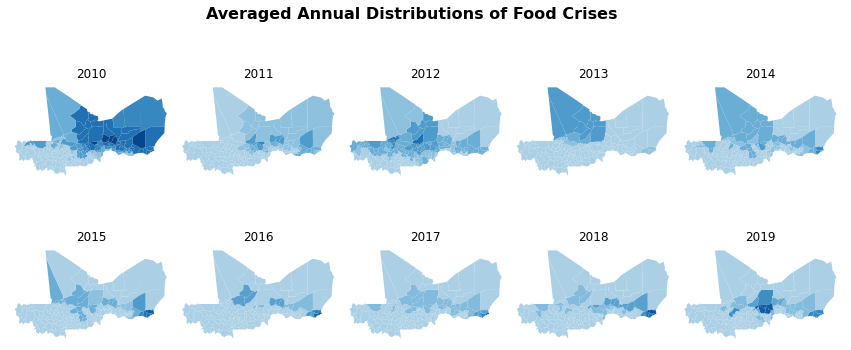

In [280]:
#### SPATIAL ANALYSIS ####

# Spatial distribution over annual average
# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 16)) #good for vertical
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6),
                         gridspec_kw={
                           'width_ratios': [3, 3, 3, 3, 3],
                           'height_ratios': [4, 4],
                       'wspace': 0,
                       'hspace': 0}) #good for vertical
fig.patch.set_facecolor('white')
fig.suptitle('Averaged Annual Distributions of Food Crises',
             fontweight ="bold", fontsize= 16)

years = list(year_m.columns)
for ax, year in zip(axes.flatten(), years):
    t = y.groupby('year').get_group(year)
    dist = pd.merge(shape, t, on='admin_name')
    dist.plot(column='fews_ipc', cmap='Blues', legend=False, ax=ax,
              vmin=0, vmax=3) #edgecolor='#eaeaea'
    ax.set(title=year)
    ax.axis('off')

fig.savefig('Images/yearly_maps.png')
plt.show()


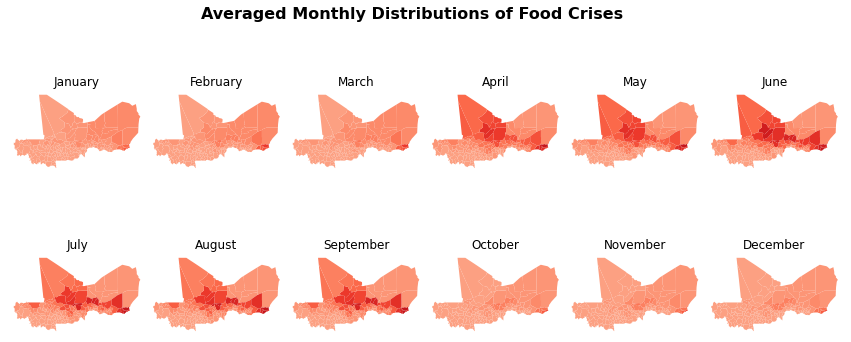

In [281]:
# Spatial distribution over monthly average
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 6),
                         gridspec_kw={
                           'width_ratios': [3, 3, 3, 3, 3, 3],
                           'height_ratios': [4, 4],
                       'wspace': 0,
                       'hspace': 0}) #good for vertical
fig.patch.set_facecolor('white')
fig.suptitle('Averaged Monthly Distributions of Food Crises',
             fontweight ="bold", fontsize= 16)

months = list(month_m.columns)
names = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
for ax, month in zip(axes.flatten(), months):
    t = m.groupby('month').get_group(month)
    dist = pd.merge(shape, t, on='admin_name')
    dist.plot(column='fews_ipc', cmap='Reds', legend=False, ax=ax,
              vmin=0, vmax=3) #edgecolor='#eaeaea'
    ax.set(title=names[month])
    ax.axis('off')

fig.savefig('Images/monthly_maps.png')
plt.show()

In [282]:
# Check Spatial Dependency
# --> Moran's Global I
w = weights.KNN.from_dataframe(shape, k=8) # Generate W from the GeoDataFrame
w.transform = 'R' # Row-standardization

# compute spatial lag of a given variable
lag = weights.spatial_lag.lag_spatial(w, year_m.mean(axis=1))
moran = esda.moran.Moran(year_m.mean(axis=1), w)
print('Morans I value: ', round(moran.I, 3)) # value of Moran’s I
print('P-value based on permutations: ', round(moran.p_norm, 3)) # p-value of I under normality assumption

Morans I value:  0.026
P-value based on permutations:  0.378


Given a confidence level of 95%, the global Moran’s I test had a p-value > 0.05,
thus failing to reject the null hypothesis and suggesting that spatial autocorrelation in this dataset
is due to chance.

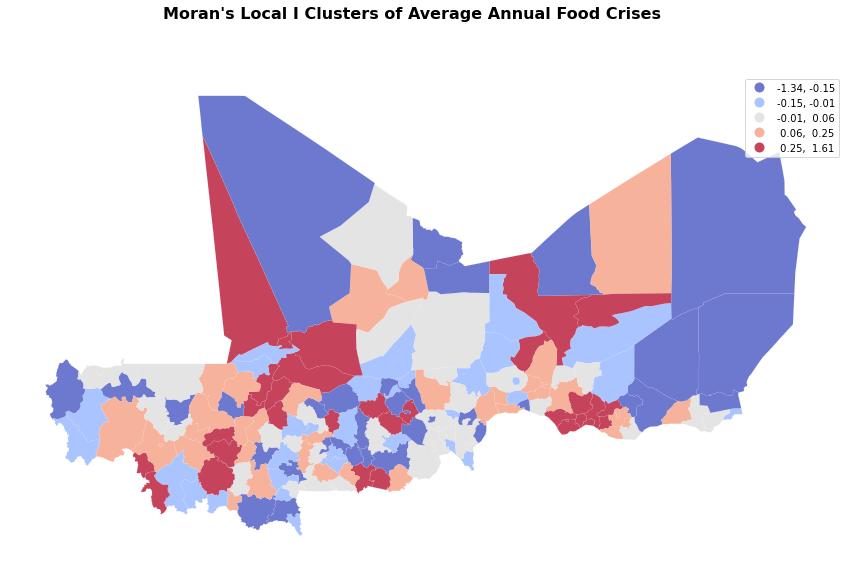

In [287]:
# --> Moran's Local I Clusters
local = esda.moran.Moran_Local(year_m.mean(axis=1), w)

fig, ax = plt.subplots(1, figsize=(15,9))
shape['Is'] = local.Is
shape.plot(column='Is', cmap='coolwarm', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0.1, alpha=0.75, legend=True,ax=ax);
ax.axis('off')
fig.patch.set_facecolor('white')
fig.suptitle("Moran's Local I Clusters of Average Annual Food Crises",
             fontweight ='bold', fontsize= 16)
fig.savefig('Images/moran_local.png')

**Temporal Analysis**

* Examine temporal distribution over annual averages & monthly averages
* Check heatmap by admin food crises means to examine effects
* Check temporal dependencies: ACF, PACF


In [300]:
#### TEMPORAL ANALYSIS ####
# Look at the mean few_ipc across country over time (in years)
q = year_m.mean(axis=0)

fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=q, mode='lines', marker_color = 'rgb(33,102,172)'))
fig.update_xaxes(title= 'Years', tickvals = [2010, 2013, 2016, 2019], showticklabels=True, visible=True, showgrid=False)
fig.update_yaxes(title= 'FEWS IPC Score', range = [0, 3], tickvals = [1, 2, 3], showticklabels=True, visible=True, showgrid=True)

fig.update_layout(title =
                  {'text': '<b>Average FEWS IPC Score Over Time (Years)</b>',
                   'font': {'size':16, 'family':'Arial', 'color': 'black'},
                   'xanchor':'center',
                   'x': 0.5,
                   'y': 0.95 },
                  font_family= 'Arial',
                  font_color='black',
                  width = 700, height = 500,
                  margin = dict(t=70,r=70,b=70,l=70))
fig.write_image('Images/trends_year.png')
fig.show()

In [301]:
# Look at the mean few_ipc across country over time (in months)
yearmonth = pd.DataFrame(list(yearmonth_m.columns))
yearmonth = yearmonth[0].str.replace('_06','')
p = yearmonth_m.mean(axis=0)

fig = go.Figure()
fig.add_trace(go.Scatter(x=yearmonth, y=p, mode='lines', marker_color = 'rgb(33,102,172)'))
fig.update_xaxes(title= 'Years', tickvals = ['2010', '2011', '2012', '2013', '2014',
                                             '2015','2016', '2017', '2018', '2019'],
                 showticklabels=True, visible=True, showgrid=False)
fig.update_yaxes(title= 'FEWS IPC Score', range = [0, 3], tickvals = [1, 2, 3],
                 showticklabels=True, visible=True, showgrid=True)
fig.update_layout(title =
                  {'text': '<b>Average FEWS IPC Score Over Time (Months)</b>',
                   'font': {'size':16, 'family':'Arial', 'color': 'black'},
                   'xanchor':'center',
                   'x': 0.5,
                   'y': 0.95 },
                  font_family= 'Arial',
                  font_color='black',
                  width = 700, height = 500,
                  margin = dict(t=70,r=70,b=70,l=70))
fig.write_image('Images/trends_month.png')
fig.show()

In [ ]:
fig, ax = plt.subplots(2,1, gridspec_kw=dict(left=0.1, right=0.9, bottom=0.1, top=0.93),
                       figsize=(15,15), sharex=False)
fig.patch.set_facecolor('white')
fig.suptitle('Autocorrelation Tests', fontweight ='bold', fontsize= 25)

sm.graphics.tsa.plot_acf(yearmonth_m.mean(axis=0), lags=50, ax=ax[0])
ax[0].set_xlabel('Lag', fontsize = 20)
ax[0].set_ylabel('ACF', fontsize = 20)
ax[0].set_title(None)
ax[0].set_facecolor('#E5ECF6')
ax[0].grid(axis = 'y')
ax[0].spines['left'].set_color('white')        # setting up Y-axis tick color to red
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')        # setting up Y-axis tick color to red
ax[0].spines['bottom'].set_color('white')

sm.graphics.tsa.plot_pacf(yearmonth_m.mean(axis=0), lags=50, ax=ax[1])
ax[1].set_xlabel('Lag', fontsize = 20)
ax[1].set_ylabel('PACF', fontsize = 20)
ax[1].set_title(None)
ax[1].set_facecolor('#E5ECF6')
ax[1].grid(axis = 'y')
ax[1].spines['left'].set_color('white')        # setting up Y-axis tick color to red
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')        # setting up Y-axis tick color to red
ax[1].spines['bottom'].set_color('white')
plt.rc('grid', linestyle='-', color='white', linewidth=0.5)

plt.savefig('Images/acf_pacf.png')
plt.show()

## 4. Model Pre-processing

**Time Lags** (depends on temporal analysis)
* Time lag of 4 for general time trends
* Time lag of 6 for seasonal time trends

In [ ]:
# Group by admin
groups = df.groupby('admin_name')

# i.e. Add lag of 4 for general time trends
timelag = {}
for admin, group in groups:
    group['timelag'] = group['fews_ipc'].shift(4)
    timelag[admin] = tuple(group['timelag'])

col = set(df['year_month'].tolist())
timelag1 = pd.DataFrame.from_dict(timelag)
timelag1 = timelag1.T
timelag1.columns = set(df['year_month'].tolist())
timelag1 = timelag1.stack(dropna = False).reset_index()
timelag1.columns = ['admin_name','year_month','timelag1']

In [ ]:
# i.e. Add lag of 6 for seasonal time trends
timelag = {}
for admin, group in groups:
    group['timelag'] = group['fews_ipc'].shift(6)
    timelag[admin] = tuple(group['timelag'])

col = set(df['year_month'].tolist())
timelag2 = pd.DataFrame.from_dict(timelag)
timelag2 = timelag2.T
timelag2.columns = set(df['year_month'].tolist())
timelag2 = timelag2.stack(dropna = False).reset_index()
timelag2.columns = ['admin_name','year_month','timelag2']


**Space lag** (depends on spatial analysis)
* A. Create spatial weight matrix (Queen contiguity because we consider observations that share a vertex to be
neighbors)
* B. Extract list of neighbors for each admin_name
* C. For each list of neighbors (nest_list), at every time interval (df_m_matrix), take the neighbors average of
fews_ipc
* D. Store nested averages in final data frame


In [ ]:
# !! Make sure not to include admin of concern in this !!
s = shape.sort_values('admin_name')
s = s.reset_index()
s = s.drop(['index'], axis=1)

In [ ]:
# A. Spatial weight matrix
# Queen contiguity matrix (we consider observations that share a vertex to be neighbors)
wq = weights.contiguity.Queen.from_dataframe(s)
n = wq.neighbors
w = wq.weights
print(n)

In [ ]:
# B. Extract list of neighbors for each admin_name
from itertools import chain

neighbors = []
for i in n:
    dist = s['admin_name'][i]
    l = []
    for j in n[i]:
        name = s['admin_name'][j]
        l.append(name)
    # neighbors.add(dist, l)
    neighbors.append({dist: l})

In [ ]:
# C. For each list of neighbors (nest_list), at every time interval (df_m_matrix), take the neighbors average of fews_ipc

res = []
for item in range(len(neighbors)):
    l = list(neighbors[item].values())
    l = list(chain.from_iterable(l))
    d = list(neighbors[item].keys())
    d = d[0]
    timeseries = [d]
    for c, col in yearmonth_m.iteritems(): # iterate column numbers
        num = []
        for neigh in l:
            for r, row in yearmonth_m.iterrows():
                if r == neigh:
                    v = yearmonth_m.loc[r, c]
                    num.append(v)
        if not num:
            av = 'NA'
        else:
            av = mean(num)
        timeseries.append(av)
    res.append(timeseries)


In [ ]:
# D. Store nested averages in final data frame
c = list(yearmonth_m.columns)
c.insert(0, 'admin_name')
spacelag = pd.DataFrame(res)
spacelag.columns = c
spacelag = spacelag.set_index('admin_name')
spacelag = pd.melt(spacelag) #merge on index


**Merge space & time lags**

In [ ]:
# Merge timelag1, timelag2 and spacelag on index
df['spacelag'] = spacelag['value']
df['timelag1'] = timelag1['timelag1']
df['timelag2'] = timelag2['timelag2']
df = df[['country', 'admin_code', 'admin_name', 'centx', 'centy', 'year_month', 'year', 'month', 'fews_ipc', 'ndvi_mean',
         'rain_mean', 'et_mean', 'acled_count', 'acled_fatalities', 'p_staple_food', 'area', 'cropland_pct',
         'pop', 'ruggedness_mean', 'pasture_pct', 'spacelag', 'timelag1', 'timelag2', 'geometry']]


**Download data**

In [ ]:
df.to_csv('Data/FS_data.csv', index = False)

stop = timeit.default_timer()
print('Running Time: ', stop - start, 'seconds')